# Simulation study

This notebook illustrates an approximation to the mixing time for the Sylow--Burnside process.

In [1]:
using Plots, ProgressMeter
include("../sylow_double_cosets.jl")
Random.seed!(2025)

TaskLocalRNG()

In [2]:
p = 11
k = 10
reps = 100
n_samples = 10000
samples = zeros(Int, n_samples, reps)
@showprogress for i in 1:n_samples
    _, sizes = sylow_burnside(p, k, reps)
    samples[i, 1:reps] = sizes
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:46


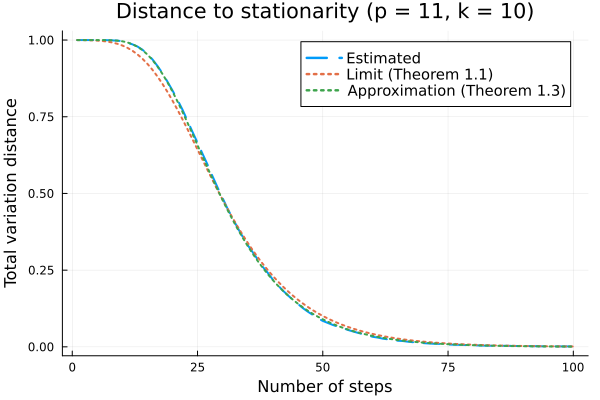

In [3]:
vals = collect(1:2*k)
emperical_dist_ = sum(samples .== reshape(vals, 1, 1, :), dims = 1)./n_samples
emperical_dist = dropdims(emperical_dist_, dims=1)
stationary_dist = stationary_distribution(p, k)
TV = sum(abs.(emperical_dist .- reshape(stationary_dist,1,:)), dims = 2)/2
ts = 1:reps
approx_TV = @. 1 - (1 - (1 - 1/p)^(ts - 1)) ^ k
cs = @. (ts - p * log(k))/p 
limit_TV = @. 1 - exp(-exp(-cs))
plt = plot(ts, TV, label="Estimated",  linewidth=2, linestyle = :dash, legendfontsize = 10)
plot!(plt, ts, limit_TV, label="Limit (Theorem 1.1)", linewidth =2, linestyle = :dot)
plot!(plt, ts, approx_TV, label="Approximation (Theorem 1.3)", linewidth = 2, linestyle = :dot)
xlabel!(plt, "Number of steps")
ylabel!(plt, "Total variation distance")
title!(plt, "Distance to stationarity (p = 11, k = 10)")
savefig(plt, "../Figures/double_cosets_p_11.pdf")
plt

In [4]:
p2 = 23
k2 = 22
reps2 = 200
n_samples = 10000
samples2 = zeros(Int, n_samples, reps2)
@showprogress for i in 1:n_samples
    _, sizes = sylow_burnside(p2, k2, reps2)
    samples2[i, 1:reps2] = sizes
end

Progress:  78%|████████████████████████████████▏        |  ETA: 0:03:02Excessive output truncated after 524377 bytes.

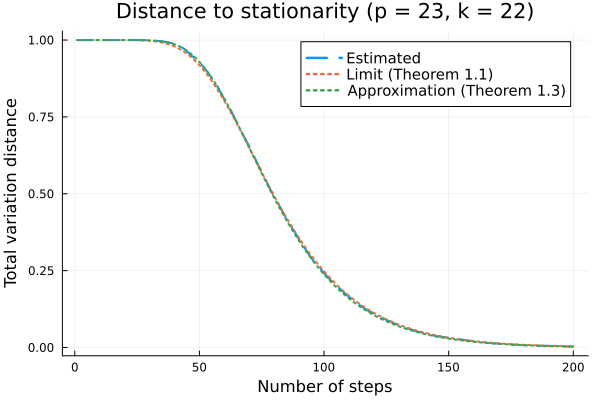

In [5]:
vals = collect(1:2*k2)
emperical_dist_ = sum(samples2 .== reshape(vals, 1, 1, :), dims = 1)./n_samples
emperical_dist = dropdims(emperical_dist_, dims=1)
stationary_dist = stationary_distribution(p2, k2)
TV = sum(abs.(emperical_dist .- reshape(stationary_dist,1,:)), dims = 2)/2
ts = 1:reps2
approx_TV = @. 1 - (1 - (1 - 1/p2)^(ts - 1)) ^ k2
cs = @. (ts - p2 * log(k2))/p2 
limit_TV = @. 1 - exp(-exp(-cs))
plt = plot(ts, TV, label="Estimated",  linewidth=2, linestyle = :dash, legendfontsize = 10)
plot!(plt, ts, limit_TV, label="Limit (Theorem 1.1)", linewidth =2, linestyle = :dot)
plot!(plt, ts, approx_TV, label="Approximation (Theorem 1.3)", linewidth = 2, linestyle = :dot)
xlabel!(plt, "Number of steps")
ylabel!(plt, "Total variation distance")
title!(plt, "Distance to stationarity (p = 23, k = 22)")
savefig(plt, "../Figures/double_cosets_p_23.pdf")
plt